# Задача 12

Сигнал, состоящий из двух гармонических осцилляций с различными частотами и амплитудами 

$$f(t) = a_0 \sin{\omega_0 t} + a_1 \sin{\omega_1 t}$$

регистрируется на некотором интервале $T$. 

Вычислить и построить график спектра мощности. Сравнить спектры, полученные с прямоугольным окном и окном Ханна, при следующих параметрах: 

$$a_0=1, \; a_1=0.002, \;\; \omega_0=5.1, \; \omega_1=5\omega_0=25.5, \;\; T = 2\pi$$

## Решение

In [1]:
import math
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt

In [2]:
#амплитуды
a0 = 1
a1 = 0.002

#частоты
w0 = 5.1
w1 = 5*w0

#интервал
T = 2*math.pi
t0 = 0
tn = T - t0

n = 100

#точки времени
t_s = np.linspace(t0, tn, n)

In [3]:
def f(t):
    return a0*math.sin(w0*t) + a1*math.sin(w1*t)

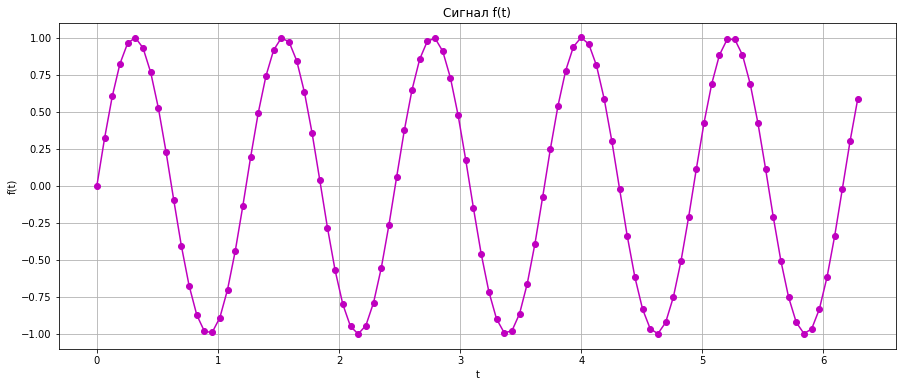

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(t_s, [f(t) for t in t_s], 'mo-')
plt.grid()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Сигнал f(t)')
plt.show()

### Теория: 
Чтобы прямое и обратное преобразования имели симметричный вид, $\omega$ -сетка также должна быть равномерной, откуда:

$$\omega_i = \frac{2\pi i}{T}, \;\;\; t_k = \frac{Tk}{n}$$

**Дискретное преобразование Фурье:**

$$\hat{f_i} = C_{+} \sum_{k=0}^{n-1}{f_k \exp{(j\cdot\frac{2 \pi ik}{n})}}$$

$$f_k = C_{-} \sum_{i=0}^{n-1}{\hat{f_i} \exp{(-j\cdot\frac{2 \pi ik}{n})}}$$

где $C_+\cdot C_- = 1/n$


Во временном представлении регистрация сигнала $f(t)$ на сетке с шириной $T$ может быть представлена в виде произведения $f(t)\cdot h(t;T)$, где $h(t;T)$ - некоторая функция.

**Прямоугольная оконная функция:**

$h(t;T)$ - ступенчатая функция: 

$$h_k = h(t_k) = 1, \;\; 0 \leq k < n$$

Периодическое продолжение сеточной функции $f(t)\cdot h(t;T)$ терпит разрывы в точках $t = mT$. Спектральная мощность разрывных функций $|\hat{f}(\omega)|^2$ медленно убывает с ростом частоты, что и приводит к уширению спектральных линий. Возникает эффект частокола.

In [5]:
def rec_w(k):
    if k>=0 and k < n:
            return 1
    return 0

Text(0, 0.5, 'h(k)')

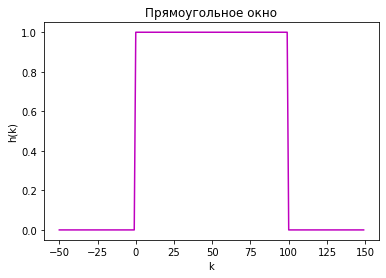

In [6]:
plt.plot(np.arange(-50, n+50), [rec_w(k) for k in np.arange(-50, n+50)], 'm')
plt.title("Прямоугольное oкно")
plt.xlabel("k")
plt.ylabel("h(k)")

**Окно Ханна:**

Зануляется на границах окна $(t = 0, t = T)$ и, следовательно, обеспечивает непрерывность $f(t)\cdot h(t;T)$. 

$$h_k = \frac{1}{2}(1 - cos(\frac{2 \pi k}{n})), \;\; 0 \leq k < n$$

Данная функция зануляется на границах периода вместе со своей первой производной, что делает периодическое продолжение сеточной функции непрерывным и гладким.

In [7]:
def hann_w(k):
    if k >= 0 and k < n:
        return 0.5*(1 - math.cos(2*math.pi*k/n))
    return 0

Text(0, 0.5, 'h(k)')

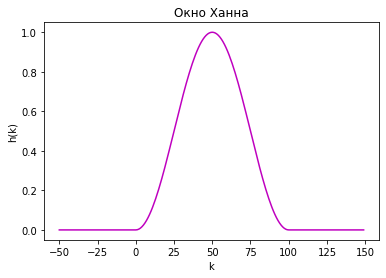

In [8]:
plt.plot(np.arange(-50, n+50), [hann_w(k) for k in np.arange(-50, n+50)], 'm')
plt.title("Окно Ханна")
plt.xlabel("k")
plt.ylabel("h(k)")

**Без окна:**

In [9]:
def no_w(k):
    return 1

### Вычисление и графики

In [10]:
def fourie_pow_spect(f, h, t_s):
    pow_spect = []
    w = []
    for i in range(n):
        fi = complex(0, 0)
        
        for k in range(n):
            fi += (1/n)*f(t_s[k])*np.exp(2*np.pi*(1j)*i*k/n)*h(k)
            
        pow_spect.append((fi*fi.conjugate()).real) #мощность - квадрат модуля
        w.append(2*np.pi*i/T)
        
    return w, pow_spect

**Без окна:**

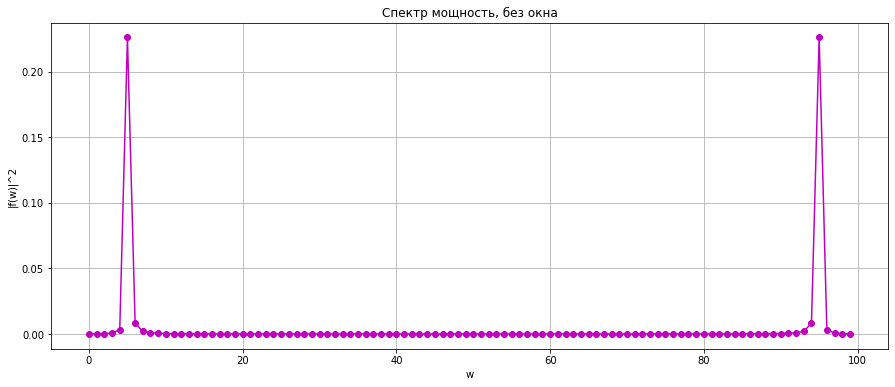

In [11]:
w_no, spec_no = fourie_pow_spect(f, no_w, t_s)

plt.figure(figsize=(15, 6))
plt.plot(w_no, spec_no, 'mo-')
plt.grid()
plt.xlabel('w')
plt.ylabel('|f(w)|^2')
plt.title('Спектр мощность, без окна')
plt.show()

**Прямоугольное окно:**

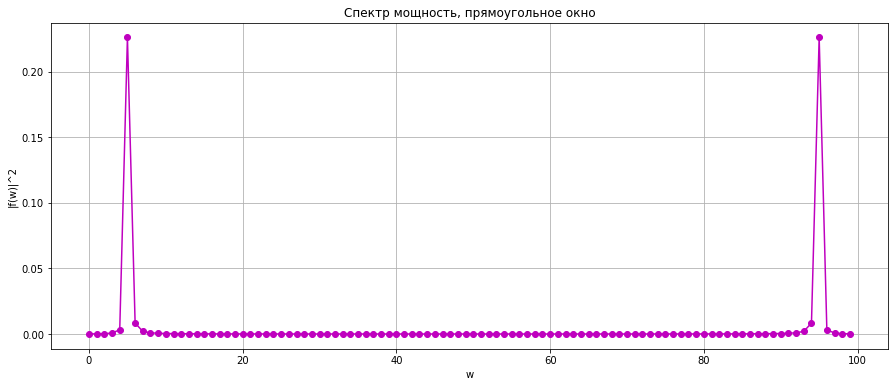

In [12]:
w_rec, spec_rec = fourie_pow_spect(f, rec_w, t_s)

plt.figure(figsize=(15, 6))
plt.plot(w_rec, spec_rec, 'mo-')
plt.grid()
plt.xlabel('w')
plt.ylabel('|f(w)|^2')
plt.title('Спектр мощность, прямоугольное окно')
plt.show()

**Окно Ханна:**

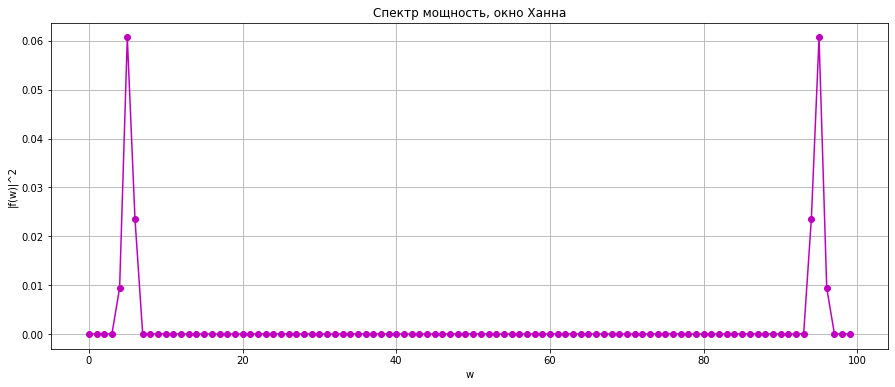

In [13]:
w_hann, spec_hann = fourie_pow_spect(f, hann_w, t_s)

plt.figure(figsize=(15, 6))
plt.plot(w_hann, spec_hann, 'mo-')
plt.grid()
plt.xlabel('w')
plt.ylabel('|f(w)|^2')
plt.title('Спектр мощность, окно Ханна')
plt.show()

---

*Нигде нет пика на 25.5 (вторая гармоника), но есть "лишний" пик.
Информация куда-то потерялась.*

---

Эффект частокола приводит к искажению регистрируемой спектральной информации в случае, если частота сигнала не является целой (не кратна $2\pi/T$ ). Указанные искажения включают в себя уменьшение высоты и увеличение ширины спектральных линий, а также маскировку слабых спектральных линий за счёт слияния их с расположенными рядом более мощными линиями, уширенными за счёт эффекта частокола.

Частота дискретизации: $\Omega = 2\pi n/T = n$

При дискретизации аналогового сигнала потерь информации не будет только в том случае, если (спектральная плотность) наивысшая частота полезного сигнала равна половине или меньше частоты дискретизации (*Частота Найквиста*).

In [14]:
def fourie_pow_spect_2(f, h, t_s):
    pow_spect = []
    w = []
    for i in range(round(n/2)):
        fi = complex(0, 0)
        
        for k in range(n):
            fi += (1/n)*f(t_s[k])*np.exp(2*np.pi*(1j)*i*k/n)*h(k)
            
        pow_spect.append((fi*fi.conjugate()).real) #мощность - квадрат модуля
        w.append(2*np.pi*i/T)
        
    return w, pow_spect

**Без окна:**

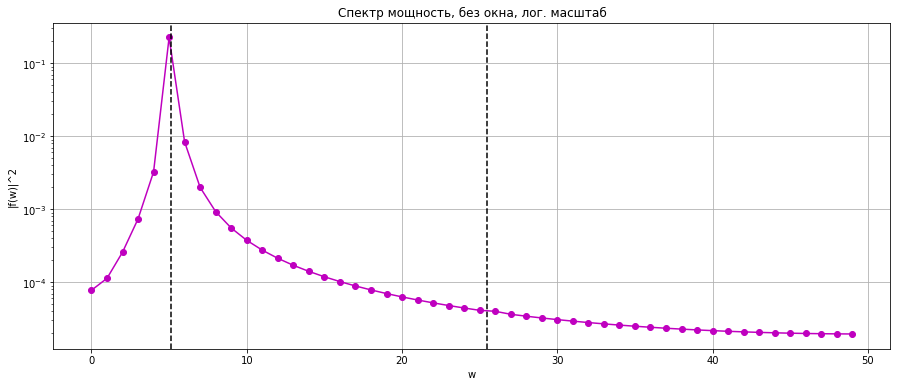

In [15]:
w_no_2, spec_no_2 = fourie_pow_spect_2(f, no_w, t_s)

plt.figure(figsize=(15, 6))
plt.plot(w_no_2, spec_no_2, 'mo-')
plt.grid()
plt.xlabel('w')
plt.yscale('log')
plt.ylabel('|f(w)|^2')
plt.title('Спектр мощность, без окна, лог. масштаб')

plt.axvline(5.1, c='k', linestyle='dashed')
plt.axvline(25.5, c='k', linestyle='dashed')

plt.show()

**Прямоугольное окно:**

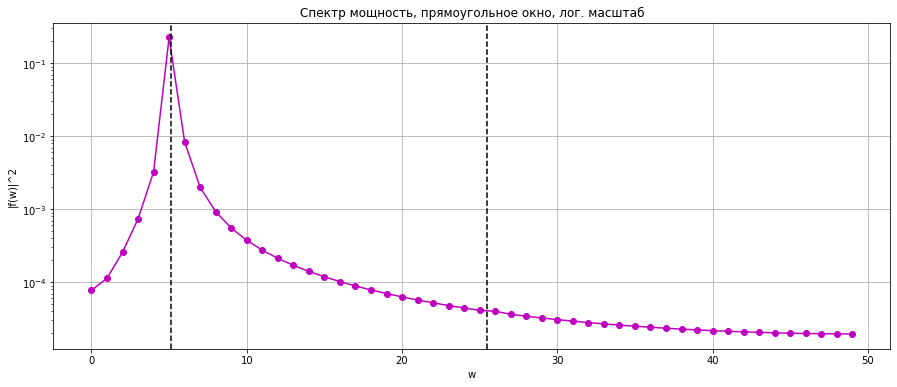

In [16]:
w_rec_2, spec_rec_2 = fourie_pow_spect_2(f, rec_w, t_s)

plt.figure(figsize=(15, 6))
plt.plot(w_rec_2, spec_rec_2, 'mo-')
plt.grid()
plt.xlabel('w')
plt.ylabel('|f(w)|^2')
plt.yscale('log')
plt.title('Спектр мощность, прямоугольное окно, лог. масштаб')

plt.axvline(5.1, c='k', linestyle='dashed')
plt.axvline(25.5, c='k', linestyle='dashed')

plt.show()

**Окно Ханна:**

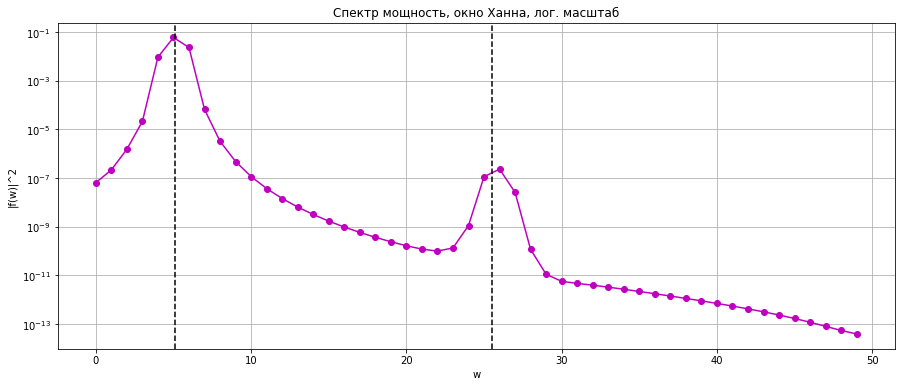

In [17]:
w_hann_2, spec_hann_2 = fourie_pow_spect_2(f, hann_w, t_s)

plt.figure(figsize=(15, 6))
plt.plot(w_hann_2, spec_hann_2, 'mo-')
plt.grid()
plt.xlabel('w')
plt.ylabel('|f(w)|^2')
plt.yscale('log')
plt.title('Спектр мощность, окно Ханна, лог. масштаб')

plt.axvline(5.1, c='k', linestyle='dashed')
plt.axvline(25.5, c='k', linestyle='dashed')

plt.show()

*С окном Ханна пик нашелся*